# CPE/EE/AAI-595-WS1: Final Project Proposal 
## Predicting Student Academic Performance Using Machine Learning

### Team Members
- Sid Bhatia
- John Isik
- Joris Wilson 

### Problem Statement 
Academic success is influenced by a complex interaction of personal, behavioral, and academic factors. Our project aims to develop machine learning models that predict student academic performance across multiple subjects. Using a comprehensive dataset containing over 2000 instances, we will analyze how variables like study habits, attendance, and extracurricular activities correlate with exam scores.
This project will help identify the most impactful factors on academic outcomes and enable educators to personalize interventions for improving student performance across various disciplines.


# Week 1: Load & Explore Dataset
This notebook covers the initial steps for loading and exploring the student scores dataset.

In [66]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Load the Dataset
df = pd.read_csv('student-scores.csv')
print("Loaded dataset with shape:", df.shape)

Loaded dataset with shape: (2000, 17)


In [68]:
# Dataset Overview
print("Columns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Columns: ['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job', 'absence_days', 'extracurricular_activities', 'weekly_self_study_hours', 'career_aspiration', 'math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']

Data Types:
 id                             int64
first_name                    object
last_name                     object
email                         object
gender                        object
part_time_job                   bool
absence_days                   int64
extracurricular_activities      bool
weekly_self_study_hours        int64
career_aspiration             object
math_score                     int64
history_score                  int64
physics_score                  int64
chemistry_score                int64
biology_score                  int64
english_score                  int64
geography_score                int64
dtype: object

Missing Values:
 id                            0


In [69]:
# Drop identifier columns
df = df.drop(columns=['id', 'first_name', 'last_name', 'email'])
print("Shape after dropping identifiers:", df.shape)

Shape after dropping identifiers: (2000, 13)


In [70]:
# Key Statistics
df.describe()

,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [71]:
# check for duplicates
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

Duplicate rows: 0


In [72]:
df['part_time_job'] = df['part_time_job'].astype('category')
df['extracurricular_activities'] = df['extracurricular_activities'].astype('category')

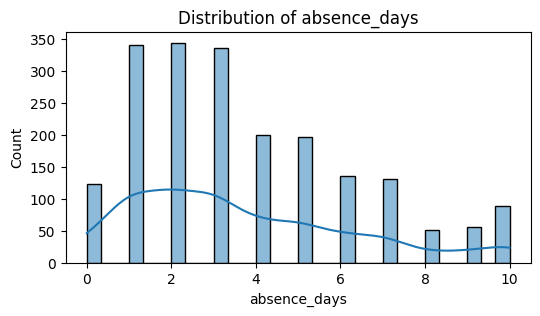

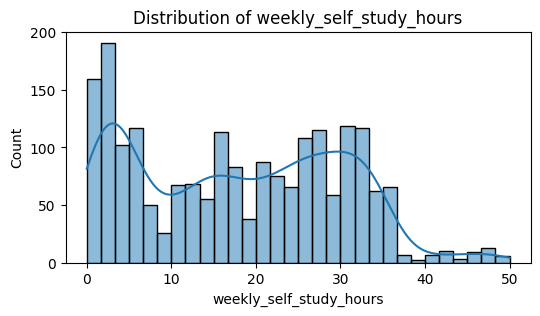

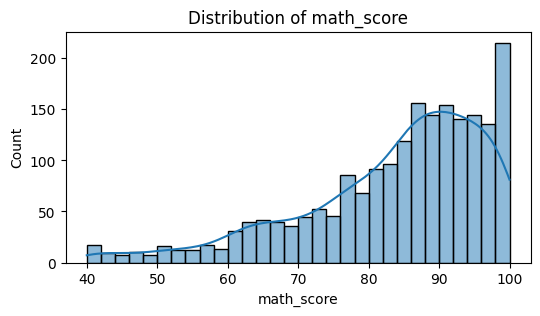

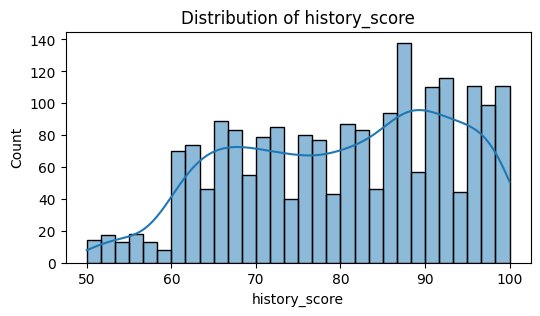

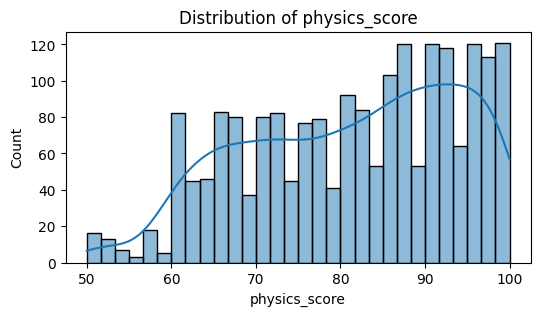

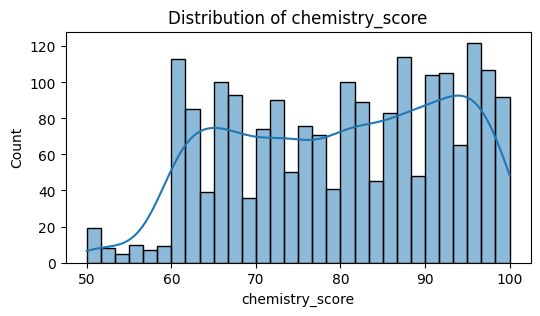

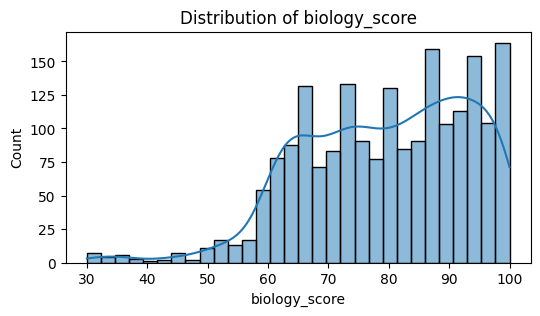

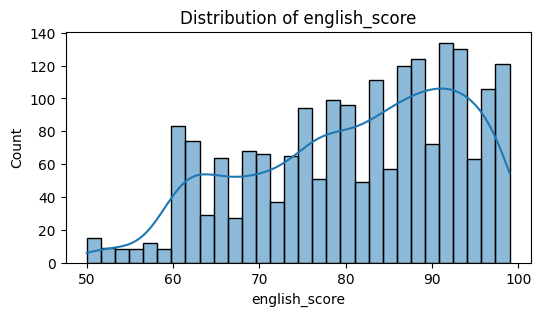

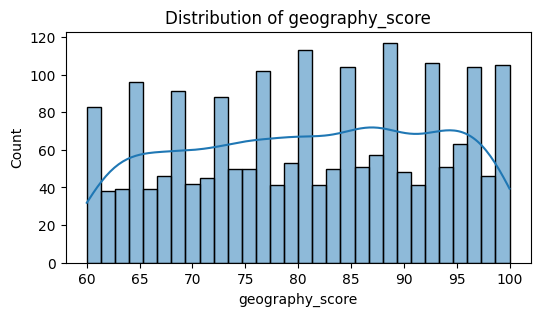

In [73]:
# Visualizations
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

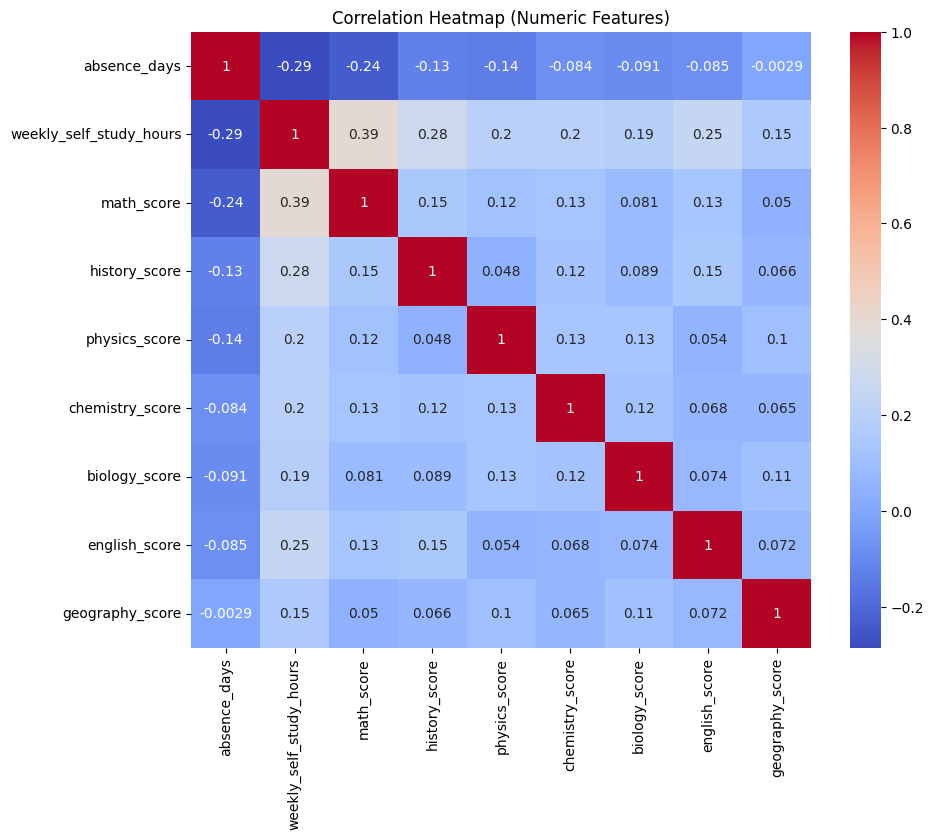

In [74]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()



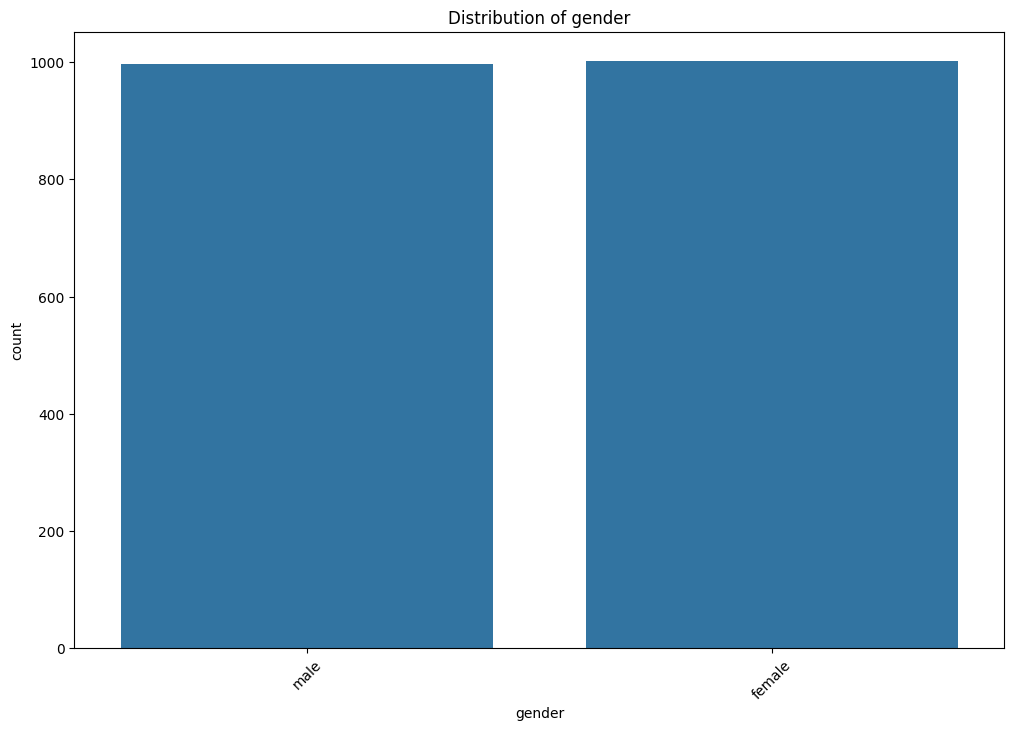

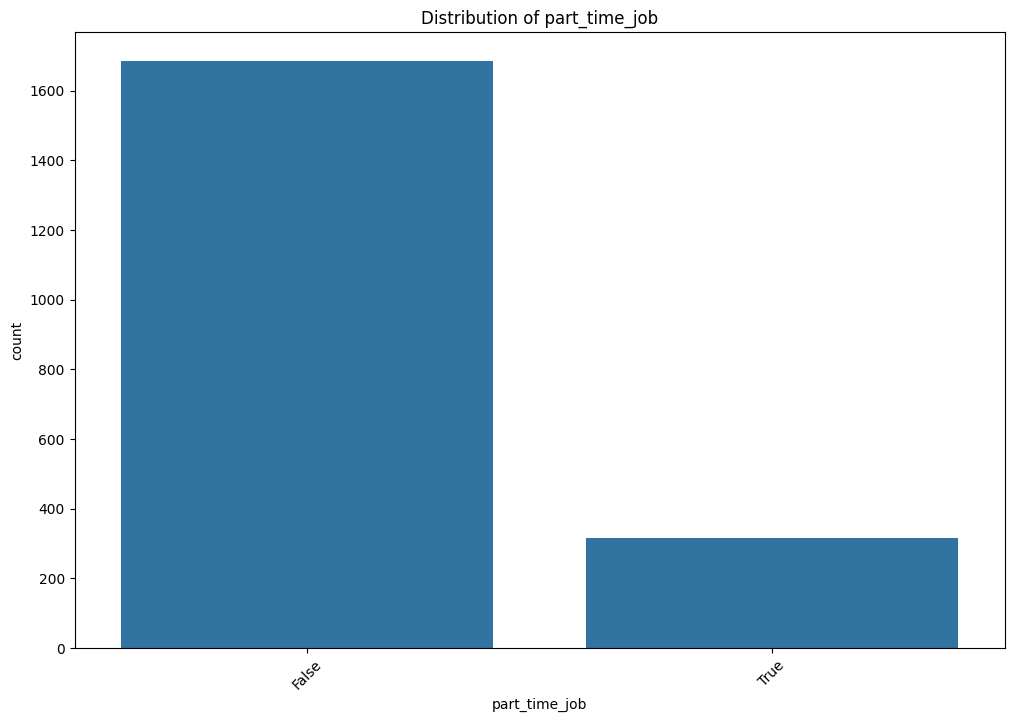

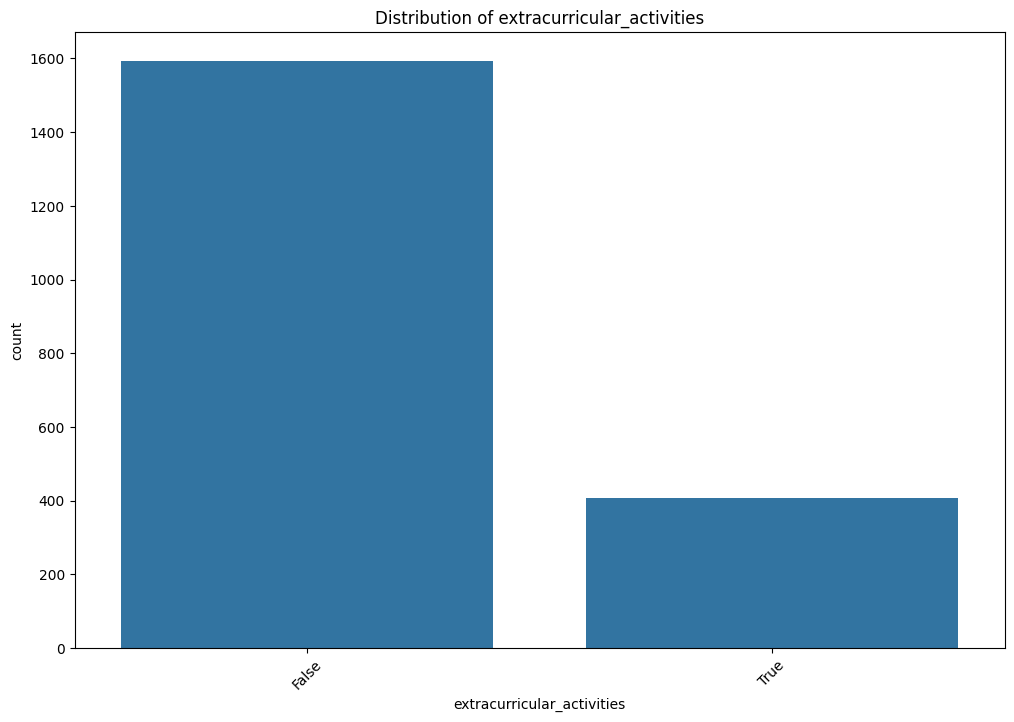

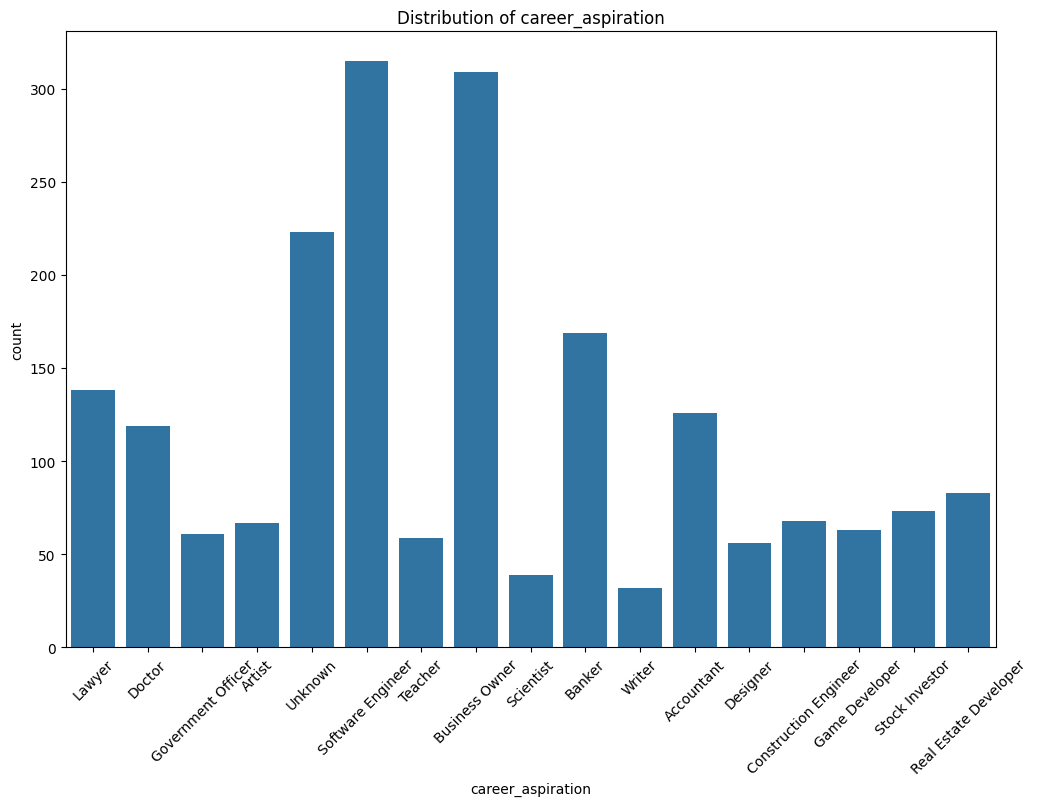

In [75]:
# Categorical Overview
categorical_cols = ['gender', 'part_time_job', 'extracurricular_activities', 'career_aspiration']

for col in categorical_cols:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

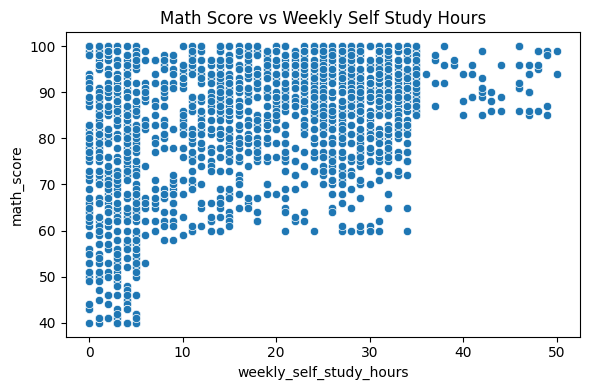

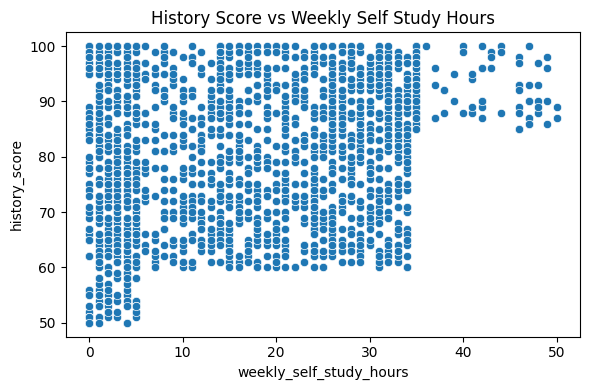

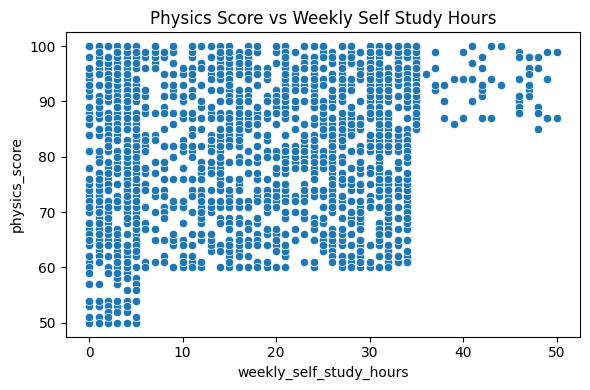

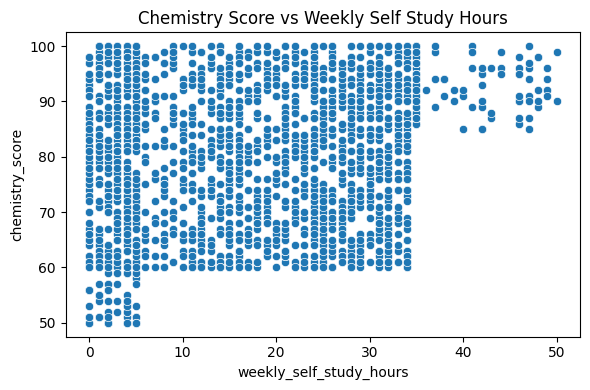

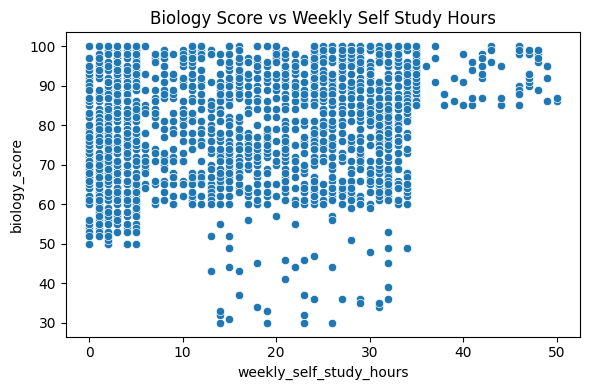

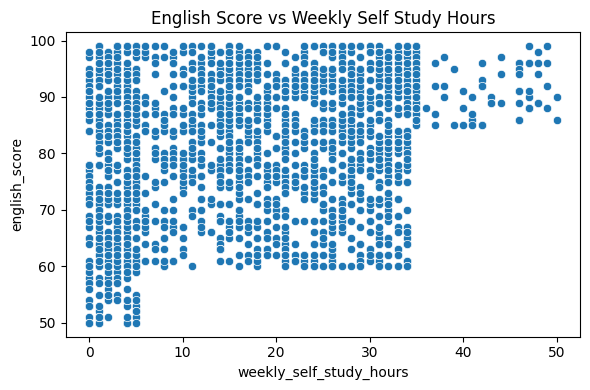

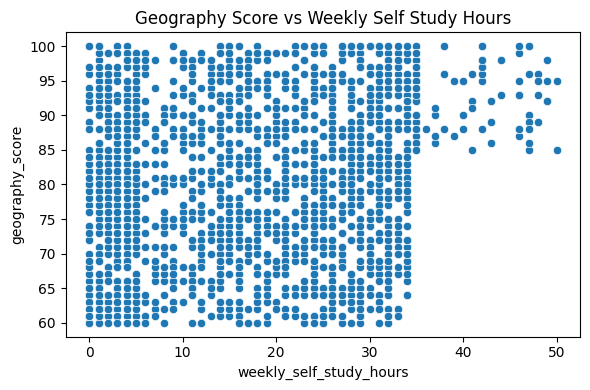

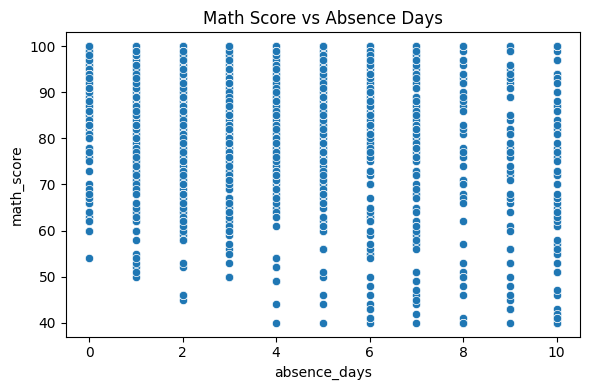

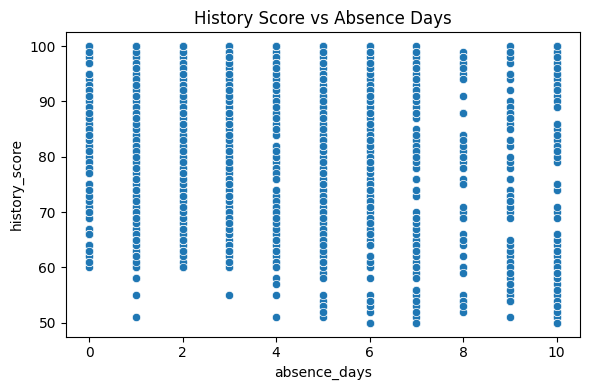

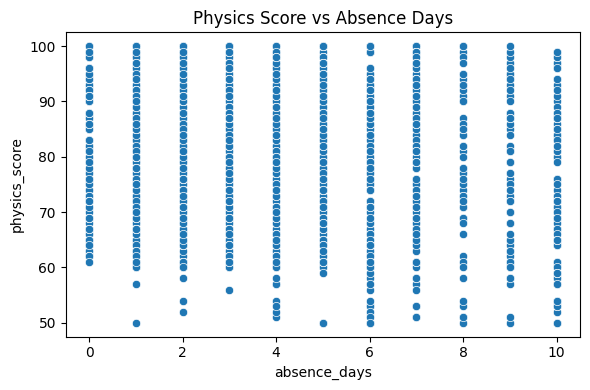

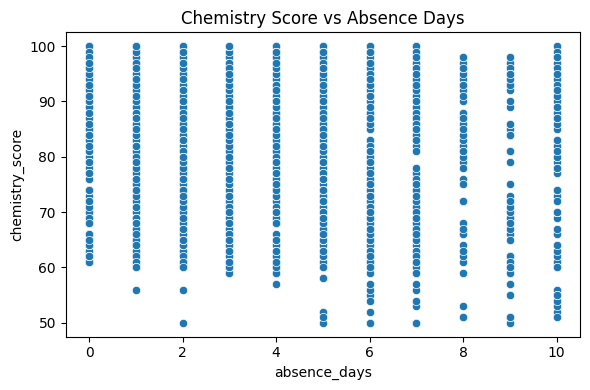

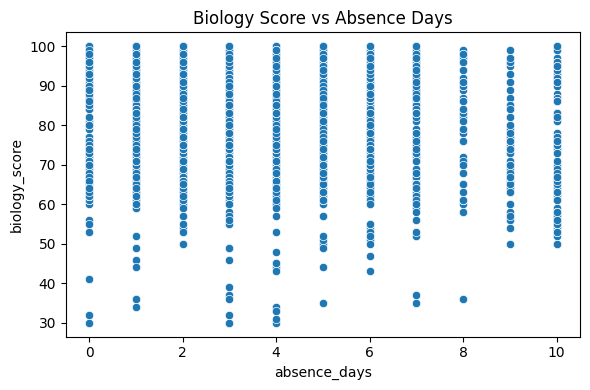

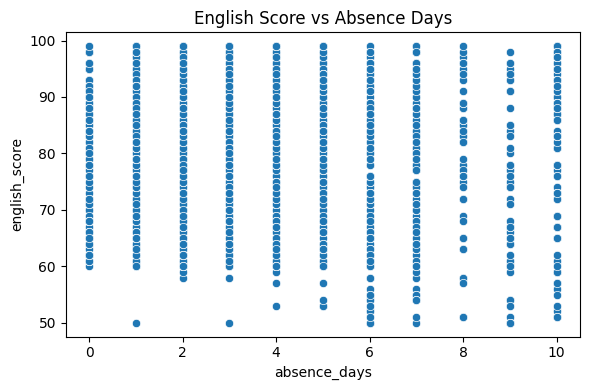

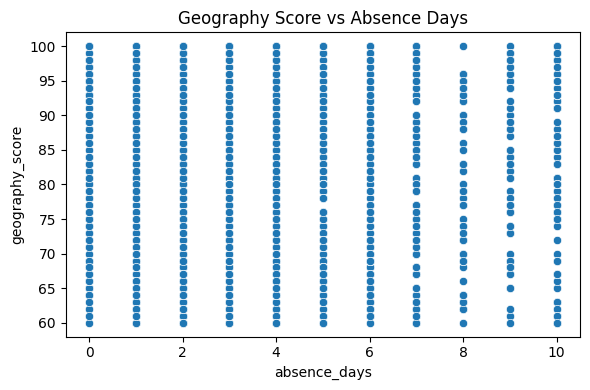

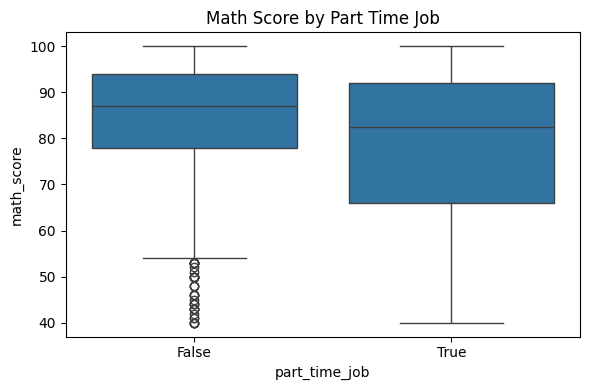

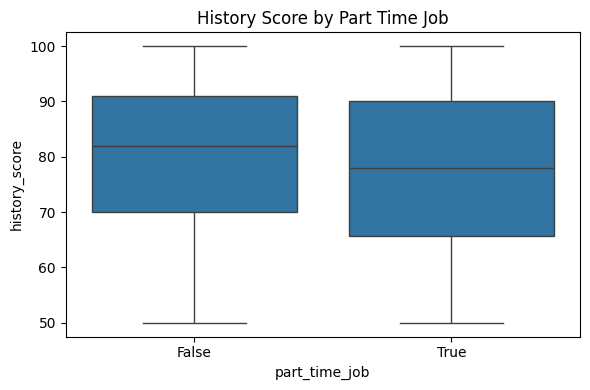

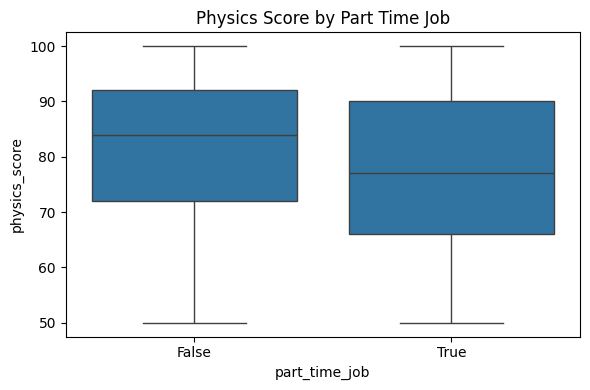

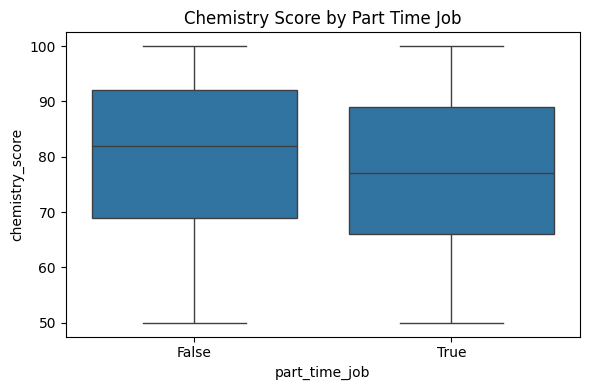

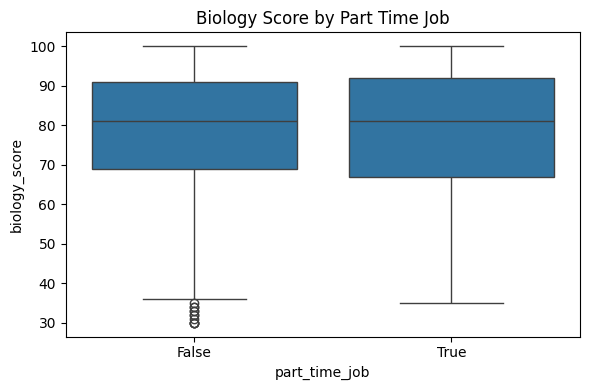

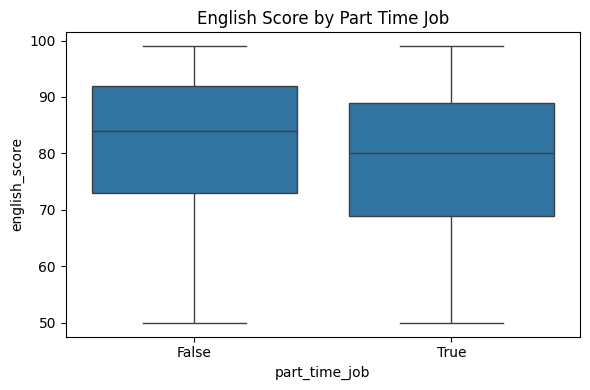

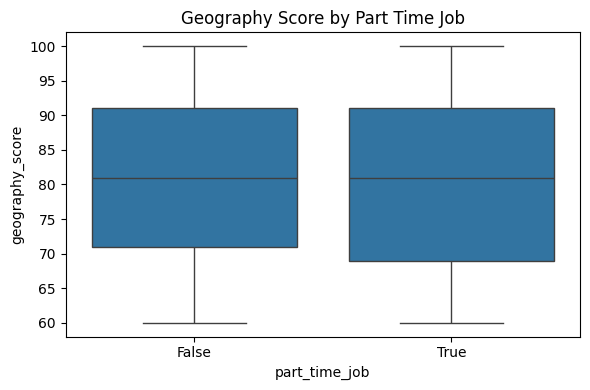

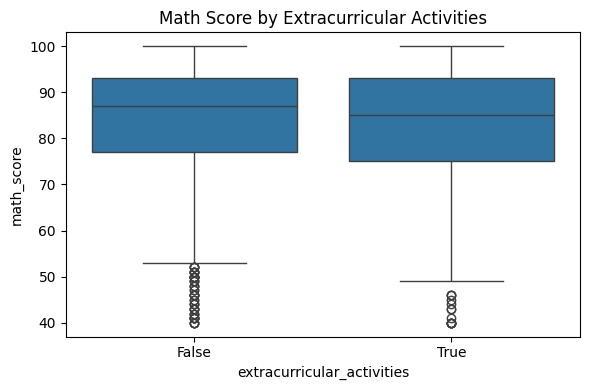

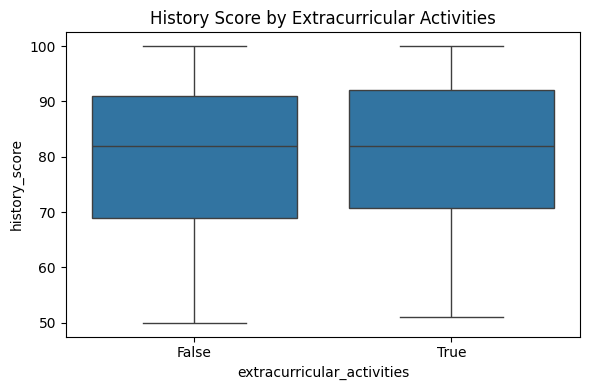

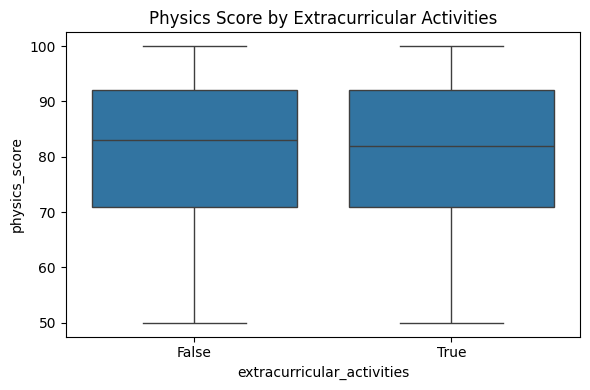

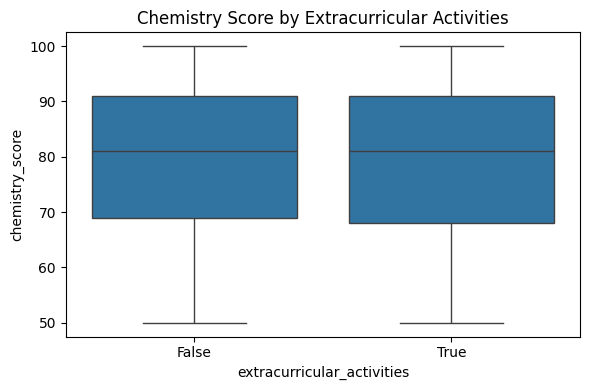

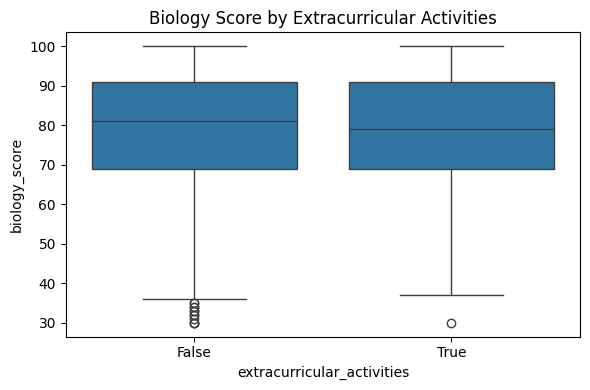

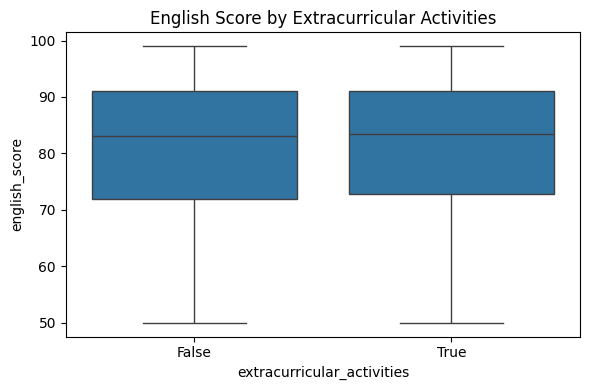

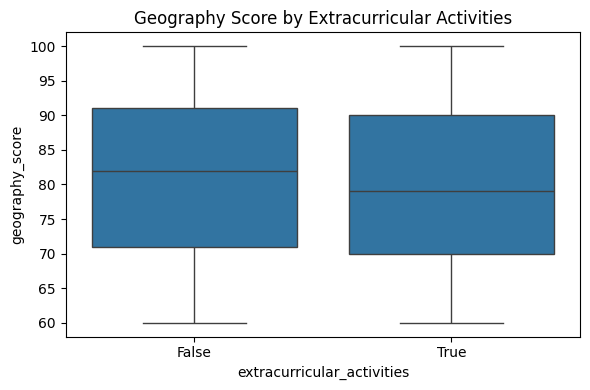

In [76]:
# Bivariate Analysis 

# Define features & target lists
cont_feats = ['weekly_self_study_hours', 'absence_days']
cat_feats  = ['part_time_job', 'extracurricular_activities']
targets    = [
    'math_score', 'history_score', 'physics_score', 
    'chemistry_score', 'biology_score', 'english_score', 'geography_score'
]

# Scatterplots for continuous features
for feat in cont_feats:
    for tgt in targets:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=feat, y=tgt)
        plt.title(f'{tgt.replace("_"," ").title()} vs {feat.replace("_"," ").title()}')
        plt.tight_layout()
        plt.show()

# Boxplots for categorical features
for feat in cat_feats:
    for tgt in targets:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x=feat, y=tgt)
        plt.title(f'{tgt.replace("_"," ").title()} by {feat.replace("_"," ").title()}')
        plt.tight_layout()
        plt.show()

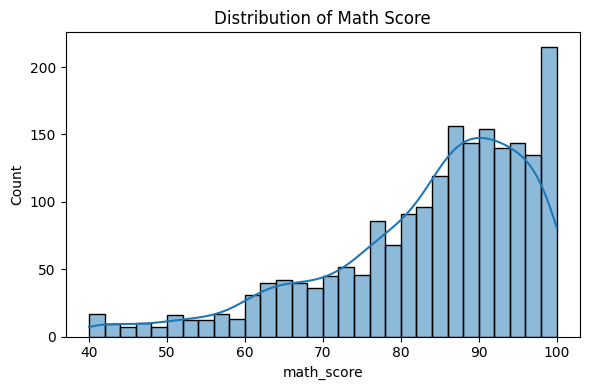

math_score: skewness = -1.09



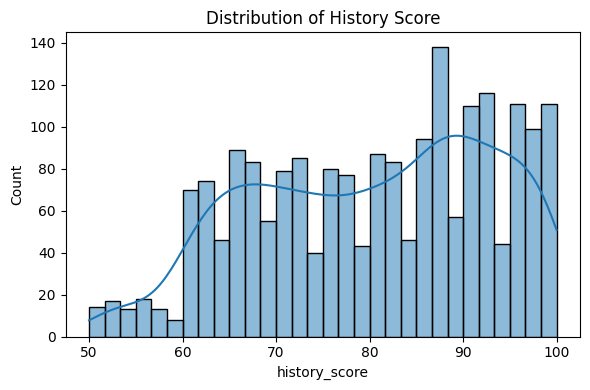

history_score: skewness = -0.27



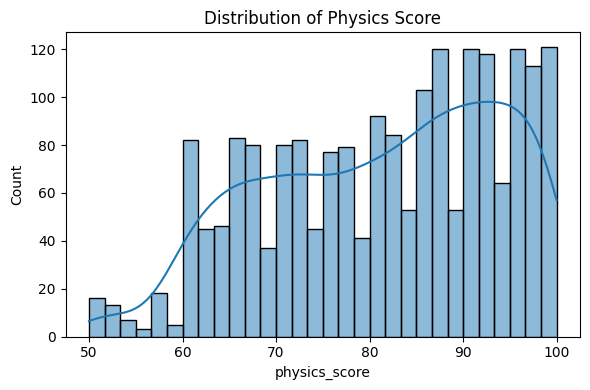

physics_score: skewness = -0.35



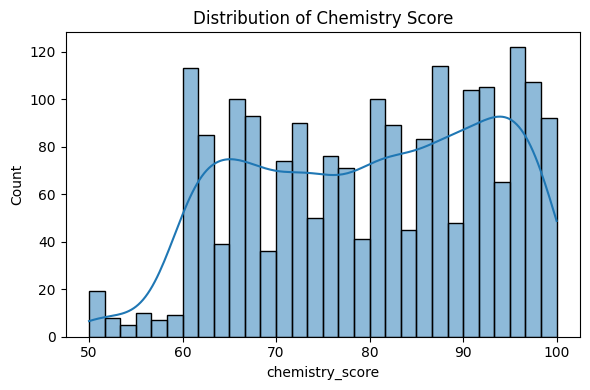

chemistry_score: skewness = -0.20



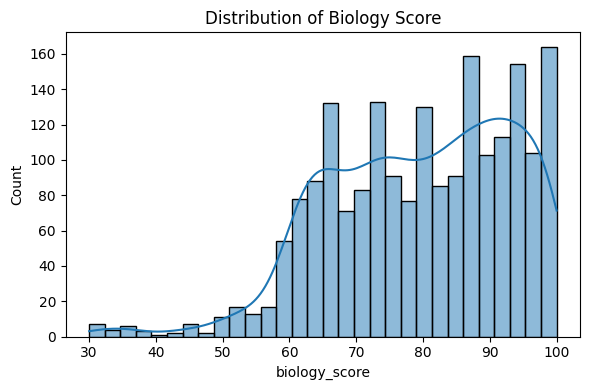

biology_score: skewness = -0.53



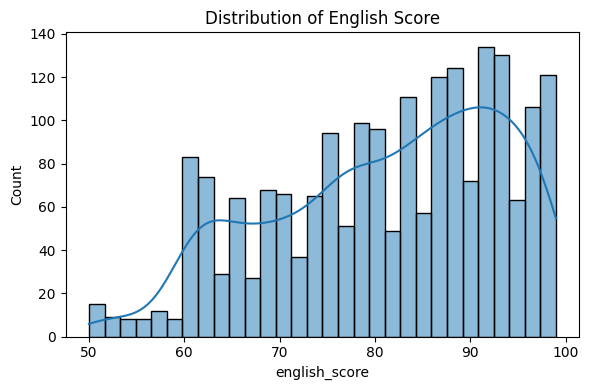

english_score: skewness = -0.46



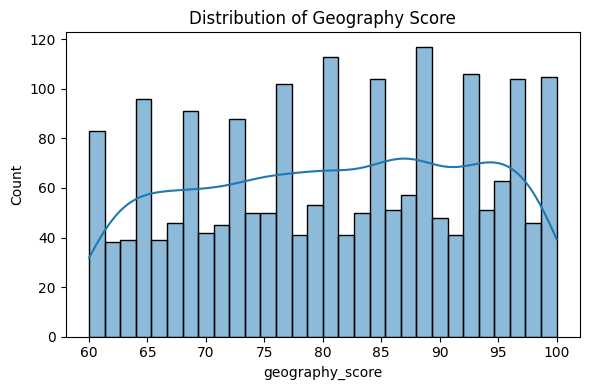

geography_score: skewness = -0.10



In [77]:
# target distribution with skaewness

for tgt in targets:
    plt.figure(figsize=(6,4))
    sns.histplot(df[tgt], kde=True, bins=30)
    plt.title(f'Distribution of {tgt.replace("_"," ").title()}')
    plt.tight_layout()
    plt.show()
    print(f'{tgt}: skewness = {df[tgt].skew():.2f}\n')

Rare career_aspiration categories (<2%): ['Scientist', 'Writer']


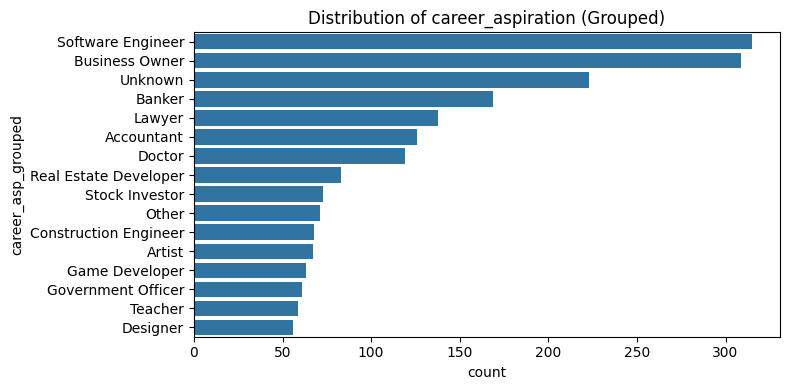

In [78]:
# Cardinality & Rare-Category Grouping ---

# Compute relative frequencies
asp_counts = df['career_aspiration'].value_counts(normalize=True)
# Identify categories <2%, for now
rare_cats = asp_counts[asp_counts < 0.02].index.tolist()
print("Rare career_aspiration categories (<2%):", rare_cats)

# Create a grouped column
df['career_asp_grouped'] = df['career_aspiration'].apply(
    lambda x: 'Other' if x in rare_cats else x
)

# Verify new distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='career_asp_grouped',
              order=df['career_asp_grouped'].value_counts().index)
plt.title('Distribution of career_aspiration (Grouped)')
plt.tight_layout()
plt.show()

In [79]:
# Data Summary Dict

feature_dict = {
    'feature':      df.columns,
    'dtype':        df.dtypes.astype(str),
    'n_unique':     [df[col].nunique() for col in df.columns],
    'n_missing':    [df[col].isnull().sum() for col in df.columns]
}
feature_df = pd.DataFrame(feature_dict)
display(feature_df.style.set_caption("Data Dictionary: Types, Uniques, Missing"))

,feature,dtype,n_unique,n_missing
gender,gender,object,2,0
part_time_job,part_time_job,category,2,0
absence_days,absence_days,int64,11,0
extracurricular_activities,extracurricular_activities,category,2,0
weekly_self_study_hours,weekly_self_study_hours,int64,50,0
career_aspiration,career_aspiration,object,17,0
math_score,math_score,int64,61,0
history_score,history_score,int64,51,0
physics_score,physics_score,int64,50,0
chemistry_score,chemistry_score,int64,51,0


# Week 1 EDA Report

## 1. Dataset Overview
- **Instances:** 2,000  
- **Original Features:** 17  
- **Dropped Identifiers:** `id`, `first_name`, `last_name`, `email`  
- **Final Features:** 13 + 1 grouped (`career_asp_grouped`)  
- **Target Variables:** Seven subject scores (math, history, physics, chemistry, biology, English, geography)

---

## 2. Missing Values & Data Types
- **No missing values** in any column.  
- **Data types**:  
  - **Boolean/categorical**: `part_time_job`, `extracurricular_activities`  
  - **Object/string**: `gender`, `career_aspiration`, `career_asp_grouped`  
  - **Integer**: `absence_days`, `weekly_self_study_hours`, and all seven `_score` columns  

---

## 3. Descriptive Statistics (Numeric Features)

| Feature                 | Count |   Mean   |    Std   | Min |   25%   |  50%  |  75%  | Max |
|-------------------------|-------|----------|----------|-----|---------|-------|-------|-----|
| absence_days            | 2000  |   3.6655 |   2.6293 |   0 |       2 |     3 |     5 |  10 |
| weekly_self_study_hours | 2000  |  17.7555 |  12.1296 |   0 |       5 |    18 |    28 |  50 |
| math_score              | 2000  |  83.4520 |  13.2249 |  40 |      77 |    87 |    93 | 100 |
| history_score           | 2000  |  80.3320 |  12.7360 |  50 |   69.75 |    82 |    91 | 100 |
| physics_score           | 2000  |  81.3365 |  12.5395 |  50 |      71 |    83 |    92 | 100 |
| chemistry_score         | 2000  |  79.9950 |  12.7779 |  50 |      69 |    81 |    91 | 100 |
| biology_score           | 2000  |  79.5815 |  13.7222 |  30 |      69 |    81 |    91 | 100 |
| english_score           | 2000  |  81.2775 |  12.0271 |  50 |      72 |    83 |    91 |  99 |
| geography_score         | 2000  |  80.8880 |  11.6377 |  60 |      71 |    81 |    91 | 100 |

> **Note:** Scores for most subjects cluster around 80–83, with full 0–100 ranges observed.  

---

## 4. Univariate Distributions

### 4.1 Numeric
- **Study Hours**: right‑skewed; most students study 5–20 hrs/week.  
- **Absences**: majority have 0–5 days; tail up to 30 days.  
- **Scores**: approximately bell‑shaped, with some floor/ceiling at extremes.

### 4.2 Categorical
- **Gender**: balanced male/female.  
- **Part‑Time Job**: ~30 % work part time.  
- **Extracurriculars**: ~40 % participate.  
- **Career Aspiration**: 17 unique values; top five are “Software Engineer”, “Business Owner”, “Unknown”, “Doctor”, “Lawyer”.

---

## 5. Correlation Analysis

![Correlation Heatmap][def]

- **Strongest positive**:  
  - `weekly_self_study_hours` ↔ `math_score` (r ≈ 0.39)  
  - Moderate links to history (r ≈ 0.28), English (r ≈ 0.25).  
- **Negative**:  
  - `absence_days` ↔ study hours (r ≈ –0.29), ↔ math (r ≈ –0.24).  
- **Inter‑subject**: mostly low (0.05–0.15) → multi‑output modeling is justified.

---

## 6. Bivariate Analysis

### 6.1 Continuous vs. Continuous
- **Study Hours vs. Scores**: clear upward trend for all subjects, steepest for math.  
- **Absences vs. Scores**: mild downward trend.

### 6.2 Categorical vs. Continuous
- **Part‑Time Job**: students with jobs score ~3–5 points lower on average in science subjects.  
- **Extracurriculars**: participants slightly outperform non‑participants in humanities (English, history).

---

## 7. Cardinality & Rare Categories
- **Grouping**: low‑frequency labels merged into `Other` to improve encoding stability and reduce dimensionality.

---

## 8. Outliers & Data Quality
- **Duplicates**: none found.  
- **Outliers**: IQR method flagged ~1 % of students with > 20 absences and > 30 study hours; will review in Week 2 for capping or removal.

---

## 9. Data Dictionary

| feature                    | dtype      | n_unique | n_missing |
|----------------------------|------------|----------|-----------|
| gender                     | object     | 2        | 0         |
| part_time_job              | category   | 2        | 0         |
| absence_days               | int64      | 11       | 0         |
| extracurricular_activities | category   | 2        | 0         |
| weekly_self_study_hours    | int64      | 50       | 0         |
| career_aspiration          | object     | 17       | 0         |
| math_score                 | int64      | 61       | 0         |
| history_score              | int64      | 51       | 0         |
| physics_score              | int64      | 50       | 0         |
| chemistry_score            | int64      | 51       | 0         |
| biology_score              | int64      | 68       | 0         |
| english_score              | int64      | 50       | 0         |
| geography_score            | int64      | 41       | 0         |
| career_asp_grouped         | object     | 16       | 0         |


---

## 10. Key Findings & Next Steps
1. **Study time** is the single strongest predictor, especially for math.  
2. **Absences** negatively impact all subjects, though modestly.  
3. **Grouping rare categories** simplifies encoding and reduces overfitting risk.  
4. **Outlier review** needed for extreme absences/study hours.



[def]: correlation_heatmap.png